# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]-273.15
        city_humidity = city_weather["main"]["humidity"] 
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#print(json.dumps(city_weather, indent = 4, sort_keys= True))
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | oban
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | wenxing
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | tura
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | colonia
Processing Record 15 of Set 1 | remire-montjoly
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | tolanaro
Processing Record 18 of Set 1 | constantia
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | roma
Processing Record 21 of Set 1 | hawaiian paradise park
Processing Record 22 of Set 1 | zaozersk
Processing Record 23

Processing Record 41 of Set 4 | pontes e lacerda
Processing Record 42 of Set 4 | ad darb
Processing Record 43 of Set 4 | nuriootpa
Processing Record 44 of Set 4 | touros
Processing Record 45 of Set 4 | el porvenir
Processing Record 46 of Set 4 | tahoua
Processing Record 47 of Set 4 | minas de marcona
Processing Record 48 of Set 4 | al aaroui
Processing Record 49 of Set 4 | geraldton
Processing Record 0 of Set 5 | madimba
Processing Record 1 of Set 5 | arthur's town
City not found. Skipping...
Processing Record 2 of Set 5 | puerto penasco
Processing Record 3 of Set 5 | vallenar
Processing Record 4 of Set 5 | calabozo
Processing Record 5 of Set 5 | sidi khaled
Processing Record 6 of Set 5 | tara
Processing Record 7 of Set 5 | christchurch
Processing Record 8 of Set 5 | kalmunai
Processing Record 9 of Set 5 | camalu
Processing Record 10 of Set 5 | kidal
Processing Record 11 of Set 5 | saint-philippe
Processing Record 12 of Set 5 | dakhla
Processing Record 13 of Set 5 | az zubayr
Processin

Processing Record 35 of Set 8 | labuan lombok
City not found. Skipping...
Processing Record 36 of Set 8 | aykhal
Processing Record 37 of Set 8 | ha'il
Processing Record 38 of Set 8 | usinsk
Processing Record 39 of Set 8 | alice springs
Processing Record 40 of Set 8 | port saint john's
Processing Record 41 of Set 8 | hetauda
Processing Record 42 of Set 8 | sofifi
City not found. Skipping...
Processing Record 43 of Set 8 | dinghaicun
Processing Record 44 of Set 8 | gore
Processing Record 45 of Set 8 | polyarnyy
Processing Record 46 of Set 8 | kavieng
Processing Record 47 of Set 8 | lebu
Processing Record 48 of Set 8 | pisco
Processing Record 49 of Set 8 | callao
Processing Record 0 of Set 9 | nikel
Processing Record 1 of Set 9 | kalispell
Processing Record 2 of Set 9 | nelson bay
Processing Record 3 of Set 9 | buenaventura
Processing Record 4 of Set 9 | saldanha
Processing Record 5 of Set 9 | haiku-pauwela
Processing Record 6 of Set 9 | mount pearl
Processing Record 7 of Set 9 | pagar al

Processing Record 25 of Set 12 | wichian buri
Processing Record 26 of Set 12 | rongelap
Processing Record 27 of Set 12 | beteza
City not found. Skipping...
Processing Record 28 of Set 12 | saipan
Processing Record 29 of Set 12 | gizo
Processing Record 30 of Set 12 | kavaratti
Processing Record 31 of Set 12 | virginia
Processing Record 32 of Set 12 | nova xavantina
Processing Record 33 of Set 12 | nokha
Processing Record 34 of Set 12 | qaryat suluq
Processing Record 35 of Set 12 | altos del rosario
Processing Record 36 of Set 12 | pirenopolis
Processing Record 37 of Set 12 | amahai
Processing Record 38 of Set 12 | tekane
City not found. Skipping...
Processing Record 39 of Set 12 | n'diareme limamoulaye
City not found. Skipping...
Processing Record 40 of Set 12 | bridgewater
Processing Record 41 of Set 12 | masterton
Processing Record 42 of Set 12 | welland
Processing Record 43 of Set 12 | mandera
Processing Record 44 of Set 12 | yafran
Processing Record 45 of Set 12 | mirnyy
Processing 

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          601
Lat           601
Lng           601
Max Temp      601
Humidity      601
Cloudiness    601
Wind Speed    601
Country       601
Date          601
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,7.54,83,79,15.20,TF,1712606467
1,bilibino,68.0546,166.4372,-19.96,97,82,1.14,RU,1712606468
2,grytviken,-54.2811,-36.5092,1.59,87,65,3.33,GS,1712606468
3,bethel,41.3712,-73.4140,17.80,28,100,0.89,US,1712605649
4,waitangi,-43.9535,-176.5597,13.79,90,100,2.24,NZ,1712606468


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,7.54,83,79,15.20,TF,1712606467
1,bilibino,68.0546,166.4372,-19.96,97,82,1.14,RU,1712606468
2,grytviken,-54.2811,-36.5092,1.59,87,65,3.33,GS,1712606468
3,bethel,41.3712,-73.4140,17.80,28,100,0.89,US,1712605649
4,waitangi,-43.9535,-176.5597,13.79,90,100,2.24,NZ,1712606468


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

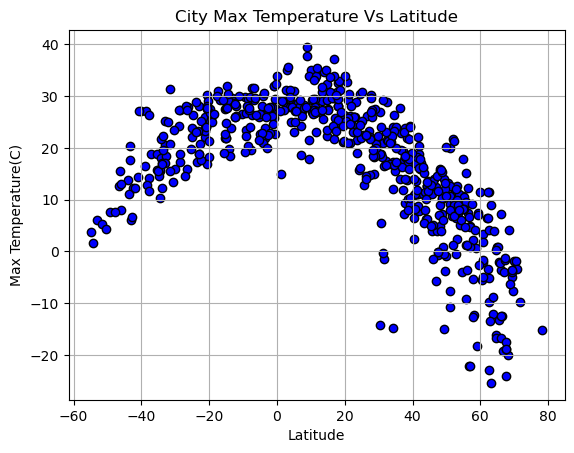

In [24]:
# Build scatter plot for latitude vs. temperature
#celsius= [ (temp - 273.15) for temp in city_data_df["Max Temp"]]
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], facecolor="blue", edgecolor= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Max Temperature Vs Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

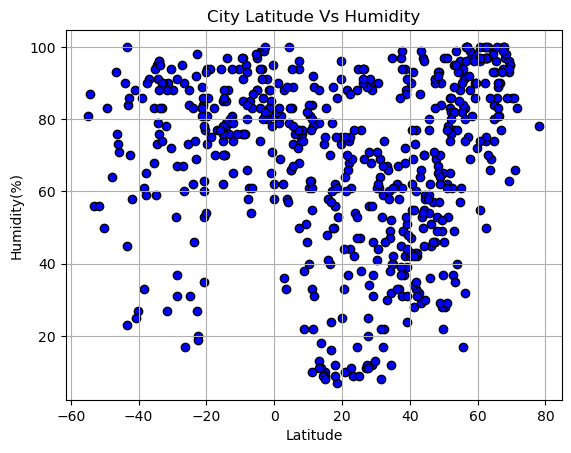

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], facecolor="blue", edgecolor= "black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude Vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

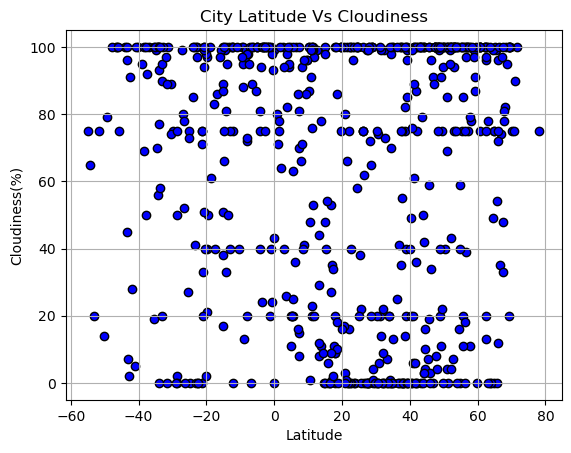

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], facecolor="blue", edgecolor= "black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude Vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

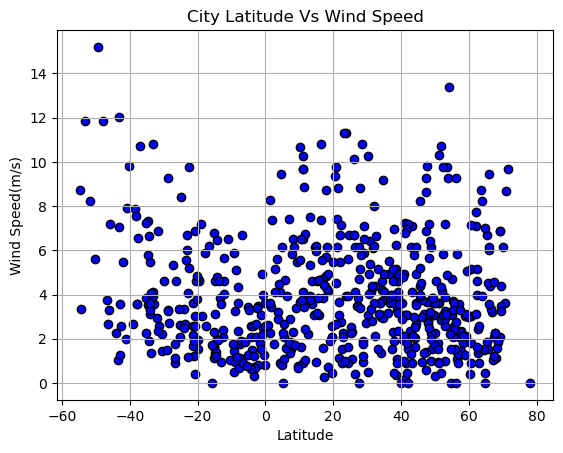

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], facecolor="blue", edgecolor= "black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude Vs Wind Speed")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots

def lin_reg(data_df, column):
    x_values = data_df["Lat"]
    y_values = data_df[column]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    print(f'The r value is {rvalue}')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6.8,1.0),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(column)
    plt.show()


In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,-19.96,97,82,1.14,RU,1712606468
3,bethel,41.3712,-73.4140,17.80,28,100,0.89,US,1712605649
5,oban,56.4127,-5.4706,7.43,83,100,1.06,GB,1712606468
8,wenxing,28.6667,112.8833,15.00,90,65,1.88,CN,1712606468
10,kodiak,57.7900,-152.4072,2.27,69,11,2.37,US,1712606468


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,7.54,83,79,15.20,TF,1712606467
2,grytviken,-54.2811,-36.5092,1.59,87,65,3.33,GS,1712606468
4,waitangi,-43.9535,-176.5597,13.79,90,100,2.24,NZ,1712606468
6,blackmans bay,-43.0167,147.3167,6.07,84,7,3.57,AU,1712605709
7,port elizabeth,-33.9180,25.5701,18.39,96,77,3.13,ZA,1712606226


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.8422618321782813


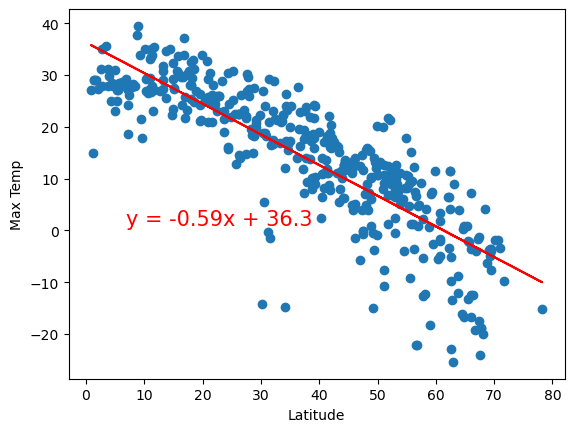

In [60]:
# Linear regression on Northern Hemisphere

lin_reg(data_df= northern_hemi_df, column= "Max Temp")


The r value is 0.7309612768666741


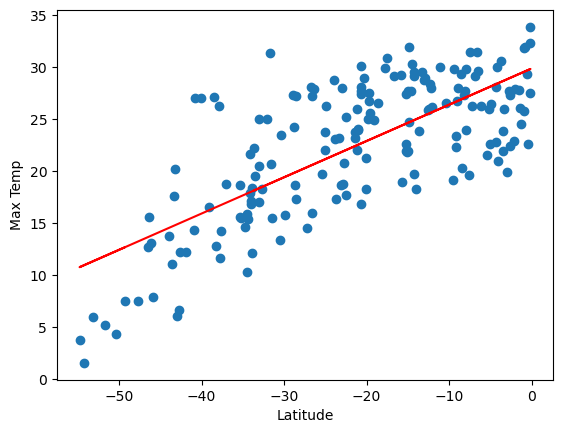

In [61]:
# Linear regression on Southern Hemisphere
lin_reg(data_df= southern_hemi_df, column= "Max Temp")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.313833738744329


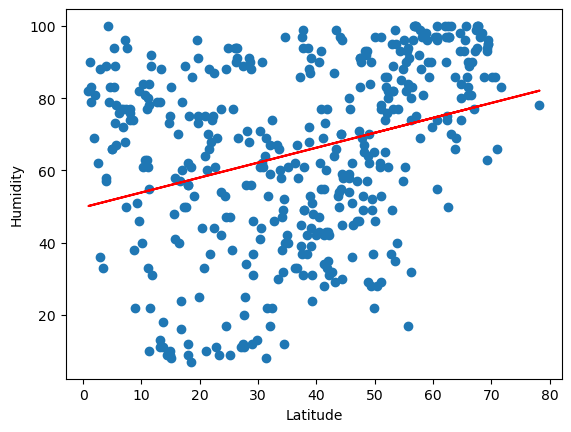

In [63]:
# Northern Hemisphere
lin_reg(data_df= northern_hemi_df, column= "Humidity")


The r value is 0.22223600383201775


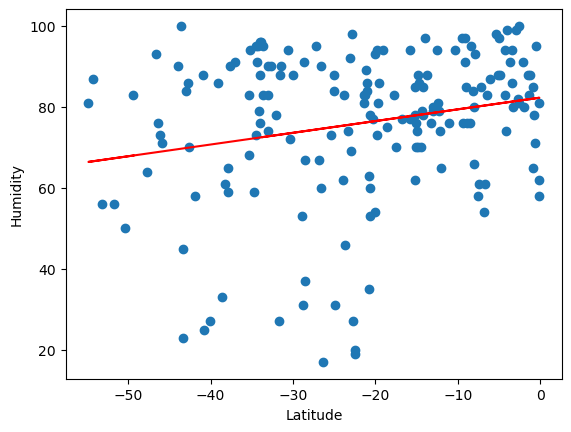

In [64]:
# Southern Hemisphere
lin_reg(data_df= southern_hemi_df, column= "Humidity")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.17059124226847383


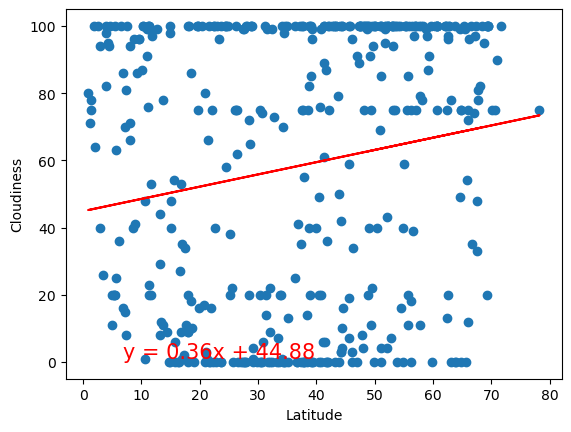

In [66]:
# Northern Hemisphere
lin_reg(data_df= northern_hemi_df, column= "Cloudiness")


The r value is 0.08807800487646938


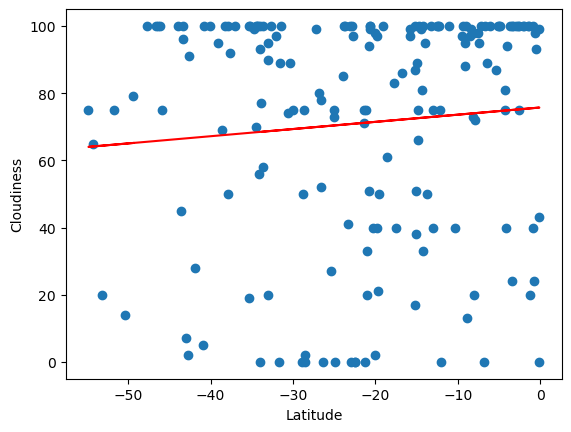

In [68]:
# Southern Hemisphere
lin_reg(data_df= southern_hemi_df, column= "Cloudiness")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r value is -0.09761219169399572


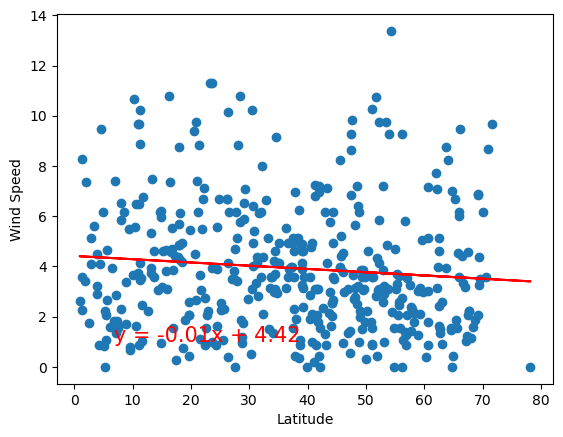

In [69]:
# Northern Hemisphere
lin_reg(data_df= northern_hemi_df, column= "Wind Speed")


The r value is -0.09761219169399572


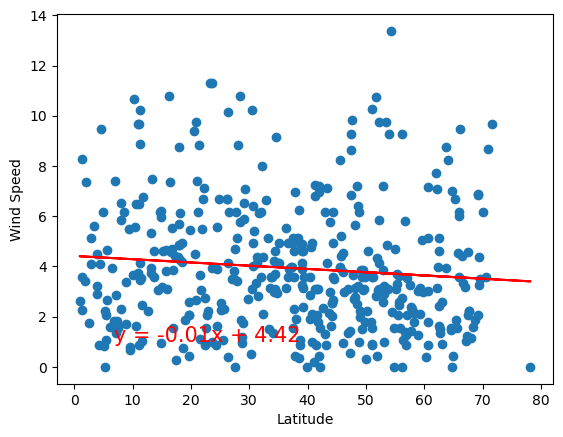

In [70]:
# Southern Hemisphere
lin_reg(data_df= northern_hemi_df, column= "Wind Speed")


**Discussion about the linear relationship:** YOUR RESPONSE HERE